In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('C:/Users/user/Downloads/SalaryData_Train.csv')

# 1- Read the Dataset: (SalaryData_Train.csv) 

In [4]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [6]:
df.shape

(30161, 14)

# 2- Data Exploration

In [7]:
#check any missing values ---> no missing values
df.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [8]:
#check any duplicated values ---> have duplicates
df.duplicated().sum()

3258

In [9]:
# Identify duplicate rows
duplicates = df[df.duplicated()]
duplicates

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [10]:
df = df.drop_duplicates()
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
30155,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [11]:
df.shape

(26903, 14)

In [12]:
#check if there's still any duplicated values ---> no duplicates
df.duplicated().sum()

0

# 3- Make Data Visualization. 

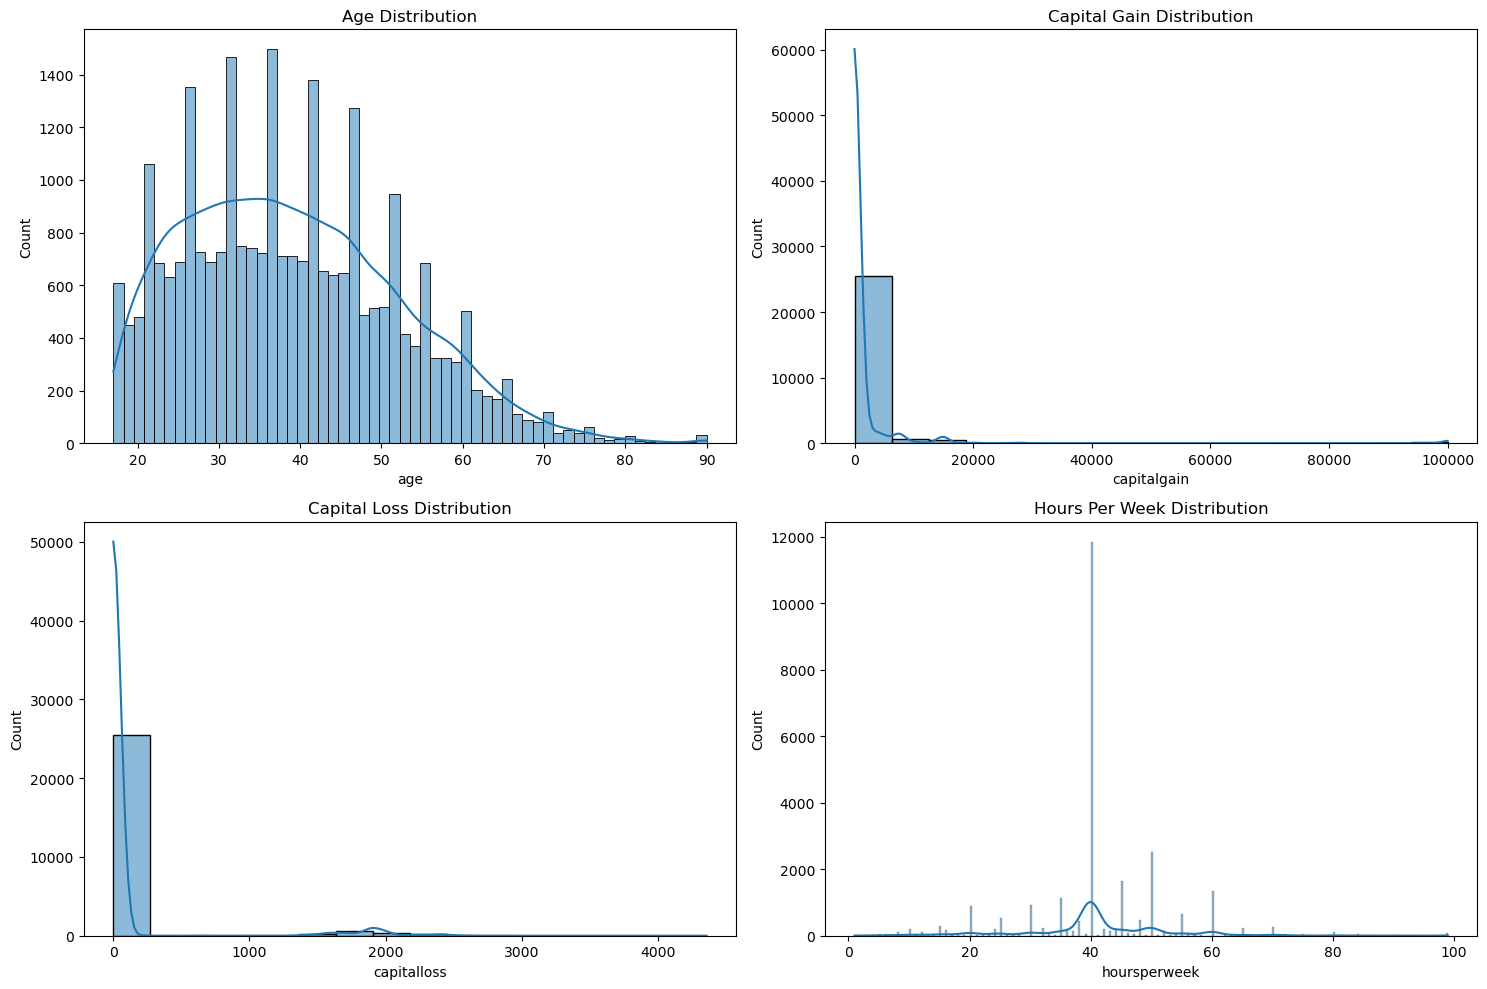

In [46]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(df['age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

sns.histplot(df['capitalgain'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Capital Gain Distribution')

sns.histplot(df['capitalloss'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Capital Loss Distribution')

sns.histplot(df['hoursperweek'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Hours Per Week Distribution')

plt.tight_layout()
plt.show()

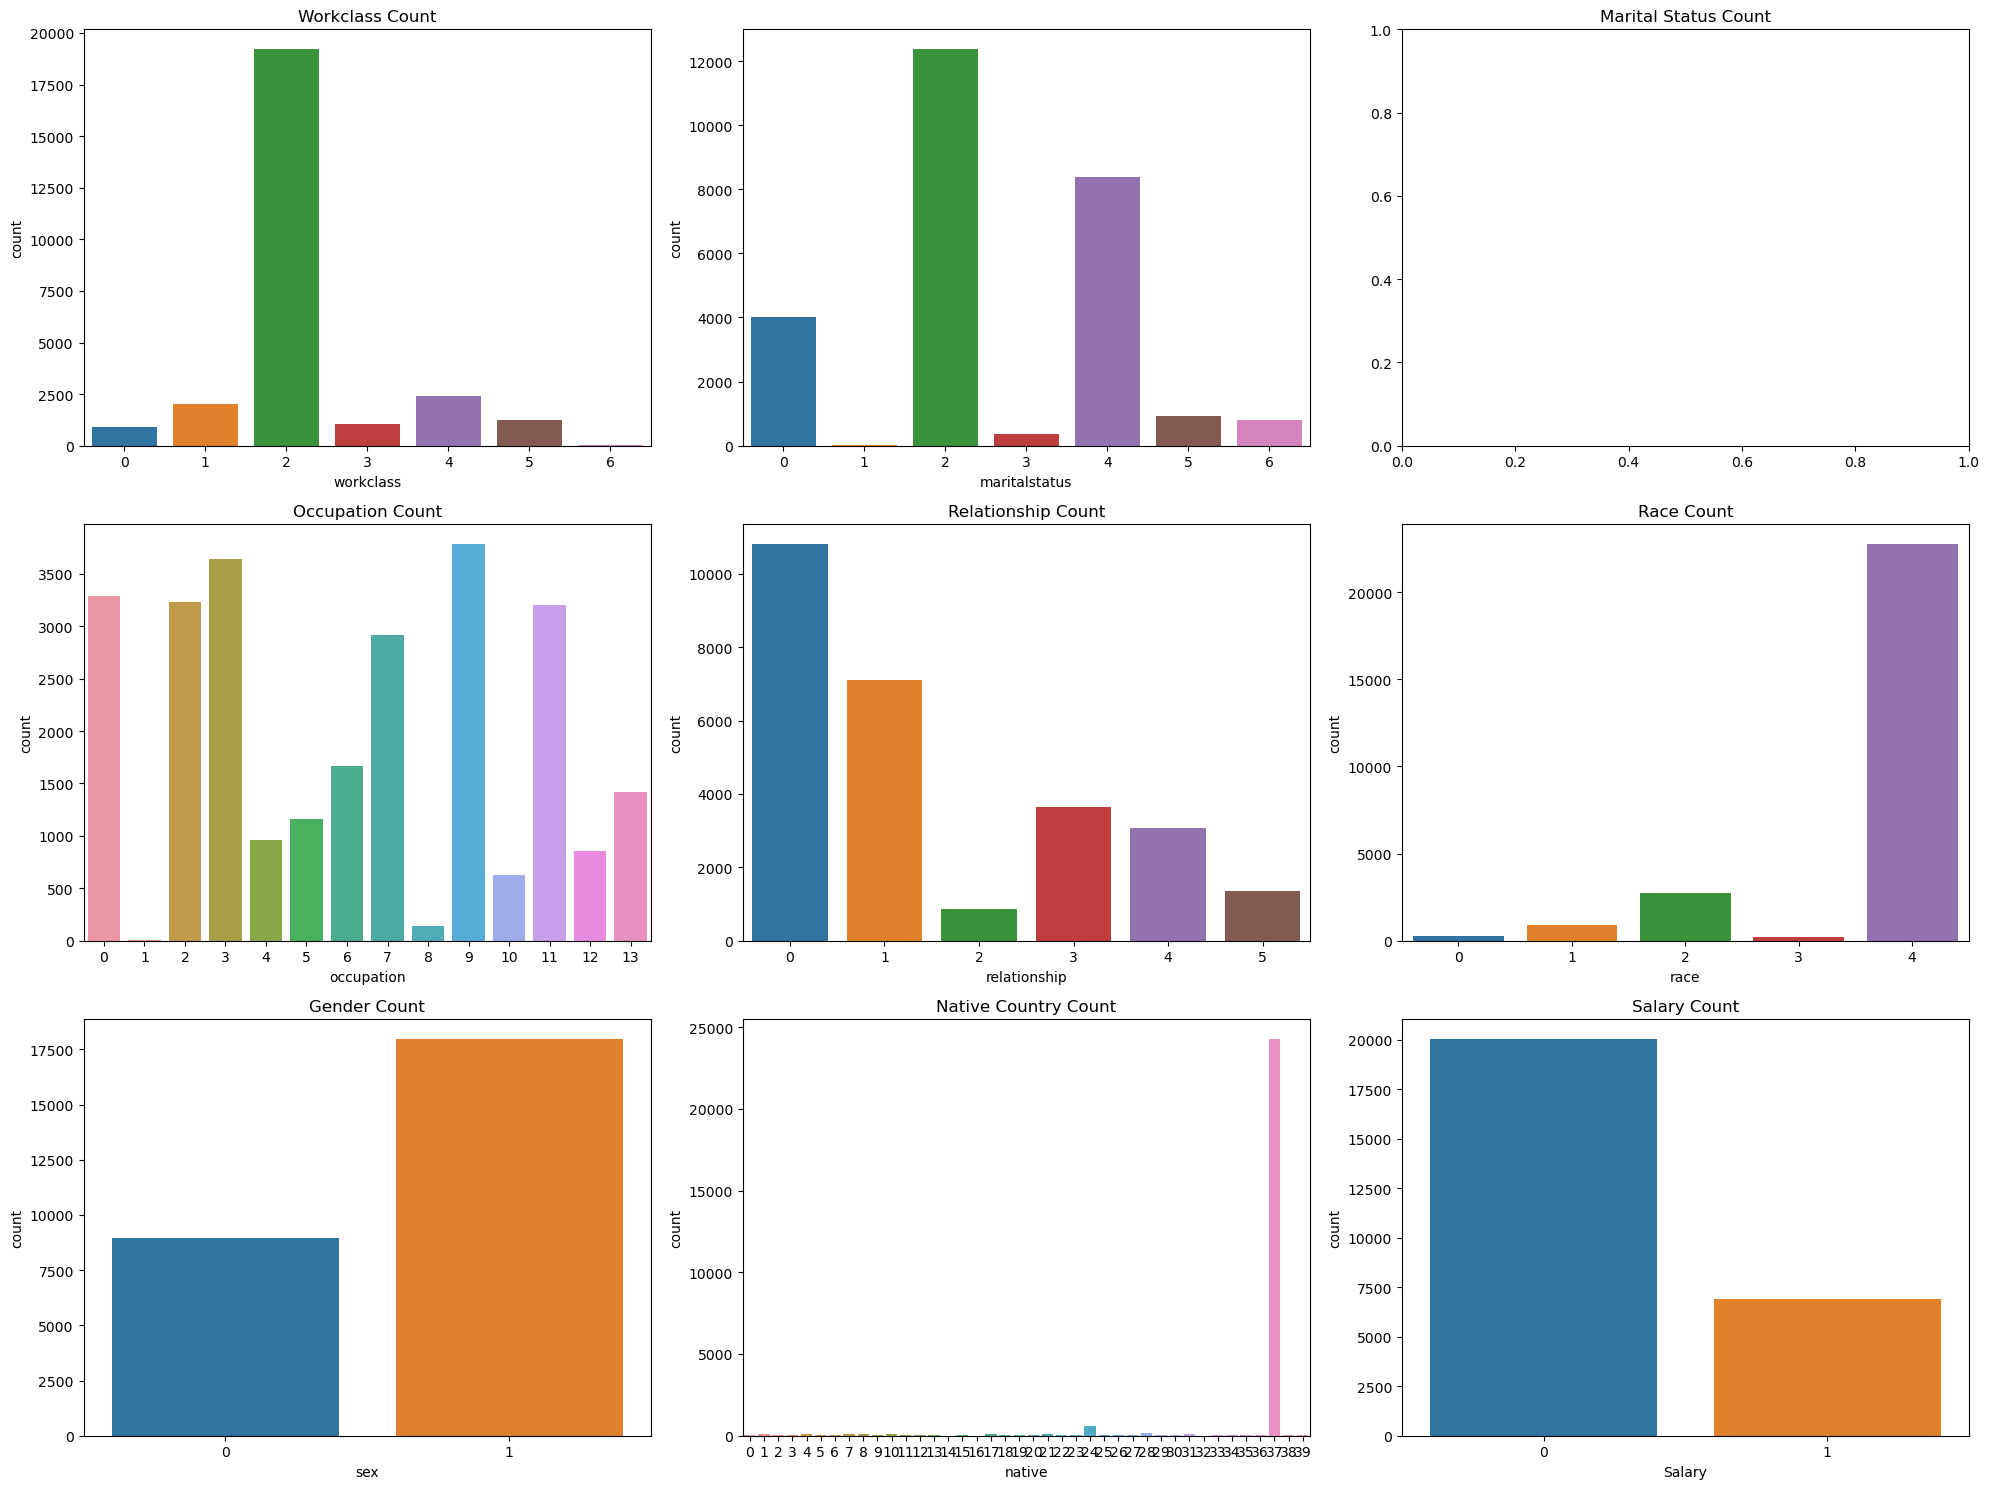

In [49]:
# Count plots for categorical features
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

sns.countplot(x='workclass', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Workclass Count')

sns.countplot(x='maritalstatus', data=df, ax=axes[0, 1])
axes[0, 2].set_title('Marital Status Count')

sns.countplot(x='occupation', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Occupation Count')

sns.countplot(x='relationship', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Relationship Count')

sns.countplot(x='race', data=df, ax=axes[1, 2])
axes[1, 2].set_title('Race Count')

sns.countplot(x='sex', data=df, ax=axes[2, 0])
axes[2, 0].set_title('Gender Count')

sns.countplot(x='native', data=df, ax=axes[2, 1])
axes[2, 1].set_title('Native Country Count')

sns.countplot(x='Salary', data=df, ax=axes[2, 2])
axes[2, 2].set_title('Salary Count')

plt.tight_layout()
plt.show()

# 4- Data Preprocessing

In [13]:
#reset the index
df.reset_index(inplace = True)
df

,index,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26898,30154,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
26899,30155,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
26900,30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
26901,30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [14]:
#drop index column
df.drop(columns = 'index', inplace = True)
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26898,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
26899,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
26900,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
26901,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [15]:
df.shape

(26903, 14)

In [18]:
#delete the education column
df.drop(columns = 'education', inplace = True)
df

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26898,53,Private,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
26899,22,Private,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
26900,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
26901,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
categorical_columns = ['workclass', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']
for column in categorical_columns:
    encoder = LabelEncoder()
    df[column] = encoder.fit_transform(df[column])

In [21]:
df.head()

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,13,2,3,0,4,1,0,0,13,37,0
2,38,2,9,0,5,1,4,1,0,0,40,37,0
3,53,2,7,2,5,0,2,1,0,0,40,37,0
4,28,2,13,2,9,5,2,0,0,0,40,4,0


In [22]:
np.max(df , axis=0)

age                 90
workclass            6
educationno         16
maritalstatus        6
occupation          13
relationship         5
race                 4
sex                  1
capitalgain      99999
capitalloss       4356
hoursperweek        99
native              39
Salary               1
dtype: int64

In [23]:
np.min(df , axis=0)

age              17
workclass         0
educationno       1
maritalstatus     0
occupation        0
relationship      0
race              0
sex               0
capitalgain       0
capitalloss       0
hoursperweek      1
native            0
Salary            0
dtype: int64

In [24]:
#split the data
x = df.drop('Salary', axis = 1) 
y = df['Salary'] 

In [25]:
x.head()

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,13,4,0,1,4,1,2174,0,40,37
1,50,4,13,2,3,0,4,1,0,0,13,37
2,38,2,9,0,5,1,4,1,0,0,40,37
3,53,2,7,2,5,0,2,1,0,0,40,37
4,28,2,13,2,9,5,2,0,0,0,40,4


In [26]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Salary, dtype: int32

In [27]:
# split data into train, test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, shuffle = True)

# 5- Train SVM Model  ,  6- Evaluate SVM Model

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
svm_model = SVC()
#fit svm_model on train data (x_train, y_train)
svm_model.fit(x_train, y_train)
#predict
svm_pred = svm_model.predict(x_test)
accuracy_score(y_test, svm_pred)

0.8002230068760453

# 7- Use grid search to select the best parameters to train SVM Model

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
svm_model = SVC()

In [32]:
params = {
    'kernel' : ['linear', 'poly', 'rbf'],
    'C' : [0.1, 0.01, 1],
    'gamma' : [0.1, 0.01, 1]
}

In [33]:
gs_model = GridSearchCV(svm_model, params)

# 8- Train SVM model with the best parameters

In [54]:
#gs_model.fit(x_train, y_train)

# I Can't Run This So I Will Use Smaller Range:

# 9- Evaluate SVM model

In [50]:
x_train_small = x_train.head(100)
y_train_small = y_train.head(100)

svm_model = SVC()
params = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 0.01, 1],
    'gamma': [0.1, 0.01, 1]
}

gs_model = GridSearchCV(svm_model, params)

X_small, _, y_small, _ = train_test_split(x_train_small, y_train_small, test_size=0.9, random_state=42)

# Fit the model on the smaller dataset
gs_model.fit(X_small, y_small)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.01, 1], 'gamma': [0.1, 0.01, 1],
                         'kernel': ['linear', 'poly', 'rbf']})

In [51]:
gs_model.best_estimator_

SVC(C=0.1, gamma=0.1)

In [52]:
gs_model.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}

In [53]:
gs_model.score(x,y)

0.7442664386871353